## Experiment

In [22]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from pathlib import Path
from jmd_imagescraper.core import *
from jmd_imagescraper.imagecleaner import *

In [58]:
img_path = Path("images/shoes")

shoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [59]:
shoe_types = ['running', 'bike', 'dress']

for label in shoe_types:
    duckduckgo_search(img_path, label, f'{label} shoes', max_results=150)

failed = verify_images(get_image_files(img_path))
failed.map(Path.unlink);

Duckduckgo search: running shoes


Duckduckgo search: bike shoes


Duckduckgo search: dress shoes


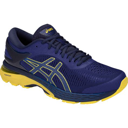

In [30]:
im = Image.open(img_path/'running/001_4669547d.jpg')
im.to_thumb(128,128)

In [85]:
dls = shoes.dataloaders(img_path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

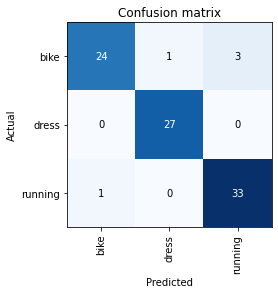

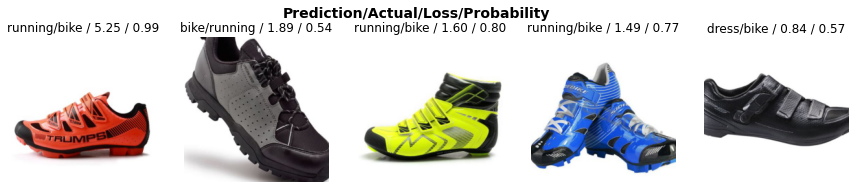

In [87]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [88]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [84]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), img_path/cat)

In [89]:
learn.dls.vocab

('running', TensorImage(2), TensorImage([2.6057e-03, 1.2605e-05, 9.9738e-01]))

In [90]:
learn.export('shoe_classifier.pkl')